# Qiskit
## Cinco elementos principais
- Terra: contem elementos fundamentais que sao usados para escrever os circuitos quanticos
- Aer: contem os recursos para as simula√ßoes quanticas por meio de computa√ßao de alto desempenho
- AQUA: Fornece alguns algoritmos ja programados para aplica√ßao em certas areas, como finan√ßas
- Ignis: Contem as ferramentas especificas para corre√ßao de erro, como ruido quantico e verifica√ßao de hardware
- IBM Q Provider: N√£o √© exatamente um elemento fundamental, mas fornece as ferramentas par acessar o IBM Q Experience, que permite executar os algoritmos quanticos.

## Bits quanticos (Qubits)
- bit √© a menor unidade de informa√ßao na computa√ßao classica
    - Assume dois valores possiveis, 0 ou 1
    - Implementado em componentes eletronicos de dois estados, com dois niveis de luz, estados eletricos e etc
    - Computadores manipulam bytes(conjuntos de bits, normalmente 8)
- Qubits
    - podem ser representados por uma combina√ßao linear da base ortonormal de um sistema quantico de dois niveis
        - Basicamente, apesar do sistema estar em um sistema de dois niveis, ele tamb√©m pode estar em uma "mistura"(combina√ßao linear) desses estados.
                - Famosa Superposi√ßao
        - Ortonormal √© porque √© um conjunto de estados que estao independentes e que server como base para descrever qualquer outro estado do sistema
        - Basicamente, tem 2 estados, mas pode ter uma parte em um, outra em outro, estar nos dois ao mesmo tempo
                - Foge da computa√ßao normal, e ai que vem a superposi√ßao quantica da computa√ßao quantica.
    - Representada como {|0>, |1>}
        - ![image.png](imagens/representacao-matricial-superposicao.png)
    - No fim, a principal vantagem dos Qubits para os bits normais √© a capacidade de superposi√ßao, que possibilita combina√ßoes lineares entre os vetores da base computacional.
    - A representa√ßao mais geral para um Qubit √© um vetor definido no espaco de Hilbert
        -   Espa√ßo de hilbert √© um espa√ßo vetorial(basicamente um playground de vetores) que vem com os conceitos de distancia e angulos, mas nao tem buracos, podendo ter infinitas dimensoes
            - ![hilbert.png](imagens/hilbert.png)
        - Tem dois numeros, sendo `Œ±` e `Œ≤`, que mostram a tendencia aos estados `|0>` e `|1>`. Ao for√ßar uma decisao(medir), a chance de virar `|0>` e de `|a|^2` e de virar `|1>` √© de `|b|^2`. Tendo que somar em 100% no fima


## Primeiros passos com Qiskit
Ap√≥s fazer a importa√ßao das bibliotecas necessarias


In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt
# from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

Com isso, temos as condi√ßoes necessarias para desenvolver um conjunto de regras ou opera√ßoes, que aplicadas nos Qubits, permitem solucionar problemas preestabelecidos, ou algoritmos quanticos.

Primeiro passo disso √© definir as bases do circuito, que ira implementar o algoritmo desejado. Come√ßando pelo conjunto de qubits que sera usado.

In [2]:
N_BITS_QUBITS = 8

registered_qubits = QuantumRegister(N_BITS_QUBITS, 'q')

# N = 8 inicialmente

Outro elemento importante √© a defini√ßao dos conjuntos de bits classicos. Onde vamos registrar as informa√ßoes vindas das medidas realizadas por Qubits depois de executar algum programa.

In [3]:
registered_bits = ClassicalRegister(N_BITS_QUBITS, 'b')

Agora podemos definir a varivel circuito, que vai usar os conjuntos de Qubits e Bits que estamos definindo

In [4]:
circuit = QuantumCircuit(registered_qubits, registered_bits)

Neste momento, temos todas a base para o nosso circuito, e condi√ßoes para definir os tres componentes principais para os algoritmso quanticos
1. Inicializa√ßao: precisamos iniciar o nosso processo de computa√ßao em um estado bem definido?
2. Portas quanticas: Em seguida, vamos aplicar as sequencias de opera√ßoes(portas) quanticas que vao permitir solucionar o problema preestabelecido
3. Medidas: No fim, medidos o resultado de cada qubit, registramos no bit normal e ent√£o interpretamos os resultados atraves de distribui√ßoes de probabilidade correspondente a cada resultado de medida?

### Inicializa√ßao
Usando a biblioteca Qiskit podemos definir os coeficientes `Œ±` e `Œ≤` e inicializar cada qubit do circuito.

#### Esfera de Bloch
Uma das representa√ßoes uteis para o estado de um qubit, √© a representa√ßao aonde √© utilizado os componentes `‚ç∫` e `Œ≤` como fun√ßoes de angulos theta e phi, `Œ∏` e `…∏`. Como `alpha` e `beta` seguem a condi√ßao de normaliza√ßao `|alpha|^2 + |beta|^2 = 1`, a equa√ßao pode ser rescrita como.
![formula-cos-sin.png](imagens/formula-cos-sin.png)

Neste caso, o par {theta, phi} um ponto em uma esfera de raio unitario, que seria a Esfera de Bloch. Que fornece a representa√ßao geometrica para o espa√ßo de Hilbert de um qubit, neste caso, sendo um ponto na superficie da esfera de Bloch e estados ortogonais sao diametralmente opostos`?`.

Usando o pacote `qiskit.visualization`, podemos usar a fun√ßao `plot_bloch_multivector` para obter a visualiza√ßao na esfera de Bloch.

Assim, apos escolher o par de `{theta, phi}` na equa√ßao, podemos obter a representa√ßao geometrica do qubit que esta descrito por `|œà>.`(fun√ßao de onda`?`)

In [5]:
for i in range(3):
    theta = (float(input("Insira o angulo theta(graus): "))) * np.pi / 180
    phi = (float(input("Insira o angulo phi(graus): "))) * np.pi / 180

    alpha = np.cos(theta / 2)
    beta = (np.exp(1j * phi)) * np.sin(theta / 2)

    state = [alpha, beta]
    circuit.initialize(state, registered_qubits[i])

    # 3 casos
    # superposicao perfeita theta = 90 phi = 0
    # certeza no estado 1: theta = 180, phi = 0
    # superposicao imaginaria: theta = 90, phi = 90 | beta vai ser um numero imaginario

Agora, podemos usar o elemento Aer para simular o estado que foi inicializado em nosso computador local.

E entao, obter o vetor de estado e plota-lo na representa√ßao da esfera de Bloch, usando o `plot_bloch_multivector`

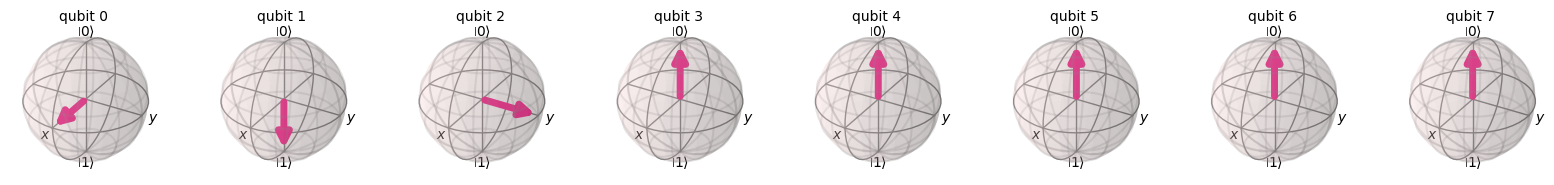

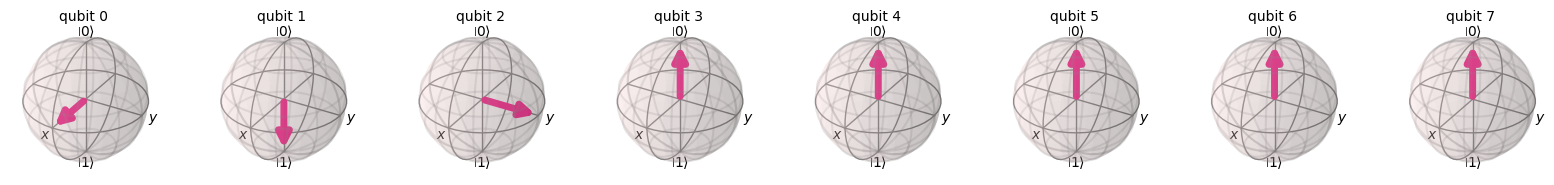

In [6]:
state_vector = Statevector(circuit)  # basicamente, pega o vetor de estados desse circuito
# o qiskit vai cuidar da simula√ßao pra mim
plot_bloch_multivector(state_vector)

##### A esfera de Bloch
A esfera de Bloch √© como um mapa visual do estado de um Qubit. Como a descri√ßao de um Qubit, matematicamente √© abstrata, usando dois numeros complexos, fica dificil visualizar. No caso, a esfera de Bloch, traduz isso para algo que nosso cerebro pode entender, no caso, uma esfera, apontando pra algum lado no espa√ßo 3d.

1. No caso, cada ponto na superficie ele mostra um possivel estado quantico para o qubit, em vez da formula, vc tem o mapa das possibilidades.
2. Intui√ßao sobre os estados: Voc√™ pode ver o estado, no caso, uma seta apontando pra cima √© `|0>`, uma seta apontando para baixo √© `|1>` e no meio seria um superposi√ßao de 50/50.
3. Intui√ßao sobre opera√ßoes: As portas quanticas(opera√ßoes) deixam de ser apenas multiplica√ßoes de matrizes, eles se tornam **rota√ßoes** em uma esfera. No caso, uma porta X, por exeplo, √® uma rota√ßao de 180 graus em torno do eixo X. No caso, voc√™ pode, inves de calcular e etc, apenas imaginar as setas rodando.

##### Porque isso funciona?
Existe uma correspondencia matematica perfeita entre a descri√ßao de um qubit e os pontos na superficie da esfera.

1. O estado do qubit √© definido por dois numeros complexos, sendo `alpha` e `beta`
2. Estes numeros, tem uma restri√ßao, que no caso, as somas de suas probabilidades tem que ser 1: $$(‚à£\alpha‚à£^2 + ‚à£\beta‚à£^2 = 1).$$
3. Existe o conceito de "fase global", que permite simplificar a descri√ßao para mostrar que 2 numeros reais podem definir unicamente o estado de um qubit.
4. No caso, definido por 2 numeros reais tamb√©m temos um ponto na superficie de um globo. Que no caso sao latitute e longitude, no nosso caso, theta e phi



### Portas qu√¢nticas
Ap√≥s definir esta base que precisamos(qubits, circuitos e etc), temos todas as condi√ß√µes de implementar as opera√ß√µes que v√£o ser aplicadas sobre eles.

Para seguir com este topico, precisamos lembrar com a computa√ß√£o classica difere da computa√ßao quantica. Na computa√ßao classica, estas "opera√ß√µes" s√£o chamadas de Portas Logicas Classicas, que seguem a Algebra Booleana, e s√£o implementadas a partir de circuitos eletronicos, que permitem a implementa√ßao de alguma opera√ßao logica em cima de alguma opera√ßao booleana.

J√° na computa√ßao quantica, existem as Portas Logicas Quanticas, ou apenas Portas Quanticas, que s√£o o equivalente as portas logicas da computa√ßao classica, operando em cima do qubits, por√©m, ao contrario das classicas, as portas logicas quanticas sao sempre reversiveis(na classica, apenas a not √©). Isso ocorre porque todas elas s√£o descritas por uma um operador unitario $U$ que obedece √† rela√ß√£o $U‚Ä†U = ùüô$, sendo $ùüô$ a matriz identidade

- Portas reversiveis (anota√ßao/explica√ßao extra)
    - Exemplo classico: AND.
        - Se o resultado de saida for 0, a entrada pode ser, 0 e 0, 1 e 0, 0 e 1. Mas voce n√£o consegue saber disso(a entrada), porque √© uma rota de m√£o unica.
    - Exemplo quantico(reversivel):
        - Porta Hadamard(pegar estado de certeza `|1>` e transformar em superposi√ßao perfeita).
            - A logica do porque ela √© reversivel √© porque caso voce aplique duas vezes a mesma opera√ßao ela volta ao resultado inicial. Ou seja: $H * H = 1$
                - Ou seja, come√ßa no estado de certeza `|0>`. Aplica Hadamard e vai para `|+>`(superposi√ßao), e aplica de novo vai para o estado inicial de volta.
    - Todas as portas quanticas √© possivel "voltar" e ver o estado inicial.

- Formula: $U‚Ä†U = ùüô$ (anota√ßao/explica√ßao extra)
    - U seria o operador unitario. Ou seja, uma matriz que representa a porta quantica, como mostrado abaixo na imagem.
    - ùüô (Matriz identidade): Opera√ßao de "n√£o fazer nada", basicamente multiplicar por 1. Nao muda o estado do qubit: A matriz identidade de 2x2 √©:
        $$ 1 = \begin{pmatrix}
            1 & 0 \\
            0 & 1
            \end{pmatrix}
        $$
        - Qualquer matriz multiplicada pela matriz identidade continua o mesmo(igual 5x1).
        - Tem 1 na diagonal principal e o resto √© 0
    - A cruz, tambem chamada de adaga, √© o simbolo para a opera√ßao inversa de U. Como se fosse um Ctrl+Z da porta quantica. Ela desfaz perfeitamente o que a porta U fez.
        - Matematica √© a "transposta conjugada"
    - Ao juntar tudo:
        -  Aplicar a opera√ßao U, e em seguida aplica a sua opera√ßao inversa, √© o mesmo de nao ter feito nada(matriz identidade).

Em seguida, vamos estudar as principais portas quanticas.

#### Portas de 1 qubit
Iniciar com a porta quantica de 1 qubit, tamb√©m conhecida como portas quanticas elementares, ou portas de Pauli, correspondentes com as matrizes de Pauli
![matriz-pauli.png](imagens/matriz-pauli.png)

Considerando a equa√ßao apresentada na representa√ßao de um Qubit, a atua√ßao das portas neste estado √©:
![atuacao-eqa.png](imagens/atuacao-eqa.png)

Neste caso, pode-se perceber que as portas de Pauli correspondem a uma rota√ßao na esfera de Bloch de $\pi$ rad no eixo da dire√ßao apresentada pela porta

- Matriz de Pauli, Portas de Pauli
    - Representa√ßao
        - O qubit √© representado pela formula ja apresentado, que seria um Vetor Coluna, sendo o numero de cima a "quantidade" do estado `|0>` e o de baixo a de `|1>`
            $$ ‚à£œà‚ü© ‚Üí \begin{pmatrix} Œ± \\ Œ≤ \end{pmatrix} $$
        - A porta, seria a a√ßao, ou seja, a porta quantica (X, Y ou Z) que √© representada por uma matriz de 2x2.
        - Neste caso, seria multiplica√ßao de Matrizes por Vetores a atua√ßao destas portas neste estado.
    - Desvendando portas
        - Porta X("Flipadora", NOT Quantico)
            - Inverte o estado do qubit, o que era `|0>` vira `|1>` e vice versa.
                $$
                    X |\psi\rangle \quad \rightarrow \quad \underbrace{\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}}_{\text{Matriz X}} \underbrace{\begin{pmatrix} \alpha \\ \beta \end{pmatrix}}_{\text{Vetor } |\psi\rangle}
                $$
                - Ent√£o, multiplicamos linha por coluna:
                    - Para linha de cima: $(0 * \alpha) + (1 * \beta) = \beta$
                    - Para a linha de baixo: $(1 * \alpha) + (0 * \beta) = \alpha$
                - Vetor resultante
                    $$
                        \begin{pmatrix} \beta \\ \alpha \end{pmatrix}
                    $$
                - Agora, precisamos traduzir este vetor de volta para a nota√ßao quantica. O valor de cima √© a nova amplitude de `|0>` e o de baixo a nova amplitude de `|1>`
                    $$
                        \beta|0\rangle + \alpha|1\rangle
                    $$
                - Que refleta a equa√ßao mostrada na imagem.
        - Porta Z ("Inversora de fase")
            - Inverte a fase(sinal) da parte uma das partes `|1>` ou `|0>`, mas deixando a outra intacta.
                - Imagine um vetor que pode apontar pra frente e tras. No caso, a porta Z inverte um dos pontos do vetor.
            $$
                Z |\psi\rangle \quad \rightarrow \quad \underbrace{\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}}_{\text{Matriz Z}} \underbrace{\begin{pmatrix} \alpha \\ \beta \end{pmatrix}}_{\text{Vetor } |\psi\rangle}
            $$
            - Multiplicando:
                - Linha de cima: $(1 * \alpha) + (0 * \beta) = \alpha$
                - Linha de baixo: $(0 * \alpha) + (-1 * \beta) = -\beta$
            - Resultando em:
                $$
                    \begin{pmatrix} \alpha \\ -\beta \end{pmatrix}
                $$
                $$
                    \alpha|0\rangle - \beta|1\rangle
                $$
        - Porta Y ("Complexa")
            - Faz o trabalho da X e Z ao mesmo tempo, ou seja, inverte o estado e a fase do qubit.
                - Como se um bot√£o da luz n√£o so ligasse e desligasse, mas tambem trocasse a cor.
            $$
                Y |\psi\rangle \quad \rightarrow \quad \underbrace{\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}}_{\text{Matriz Y}} \underbrace{\begin{pmatrix} \alpha \\ \beta \end{pmatrix}}_{\text{Vetor } |\psi\rangle}
            $$
            - Multiplicando:
                - Linha de cima: $(0 * \alpha) + (-i * \beta) = -i\beta$
                - Linha de baixo: $(i * \alpha) + (0 * \beta) = i\alpha$
            - Resultando em:
                $$
                    -i\beta|0\rangle + i\alpha|1\rangle
                $$
OBS: calculos no caderno

##### Porta NOT(X)
Usando Qiskit, podemos verificar a atua√ß√£o dessas portas em um qubit gen√©rico, a seguir vamos verificar a atua√ß√£o da porta nos estados base computacional {`|0>` e `|1>`



Antes da aplica√ßao de NOT


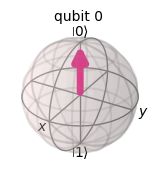

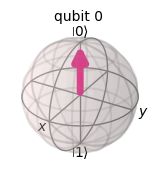

In [7]:
qNot = QuantumRegister(1, 'q')  # Reserva o espa√ßo para 1 Qubit.
circuitNot = QuantumCircuit(qNot)  # Cria o circuito que vai operar nesse Qubit
initial_not = [1, 0]  # Define o estado inicial, alpha e beta
circuitNot.initialize(initial_not, qNot)  # Injeta este estado no qubit
print("Antes da aplica√ßao de NOT")
state_vector_not = Statevector(circuitNot)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_not, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Apos aplica√ßao de NOT


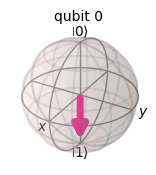

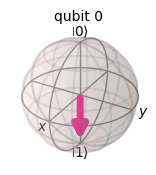

In [8]:
circuitNot.x(qNot)  # aplica a porta X (NOT)
print("Apos aplica√ßao de NOT")
state_vector_not = Statevector(circuitNot)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_not, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Como √© possivel validar ao executar o c√≥digo. A porta X atua como um inversor logico, negando o valor de entrada, parecida com a porta NOT classica, por isso √© chamada de NOT quantica.

Agora, para a aplica√ßao das portas Y e Z

Antes da aplica√ßao de Z(Inversora de fase) e Y (X e Z juntas)


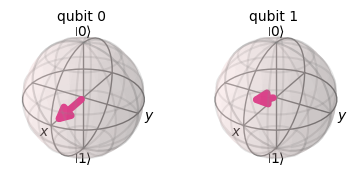

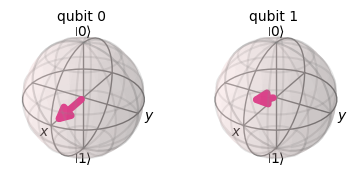

In [9]:
qZY = QuantumRegister(2, 'q')  # Reserva o espa√ßo para 1 Qubit.
circuitZY = QuantumCircuit(qZY)  # Cria o circuito que vai operar nesse Qubit
val = 1 / np.sqrt(2)
initial_Z = [val, val]  # Define o estado inicial, alpha e beta
initial_Y = [np.sqrt(0.7), np.sqrt(0.3)]  # Define o estado inicial, alpha e beta
circuitZY.initialize(initial_Z, qZY[0])  # Injeta este estado no qubit
circuitZY.initialize(initial_Y, qZY[1])  # Injeta este estado no qubit
print("Antes da aplica√ßao de Z(Inversora de fase) e Y (X e Z juntas)")
state_vector_ZY = Statevector(circuitZY)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(circuitZY, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Apos aplica√ßao de Z(Inversora de fase) e Y (X e Z juntas)


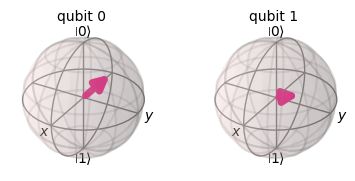

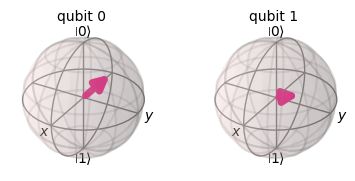

In [10]:
circuitZY.z(qZY[0])  # aplica a porta Z
circuitZY.y(qZY[1])  # aplica a porta Y
print("Apos aplica√ßao de Z(Inversora de fase) e Y (X e Z juntas)")
state_vector_ZY_af = Statevector(circuitZY)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_ZY_af, figsize=(2, 2))  # Coloca o multivetor para representar uma esfera de bloch

Podemos notar que, o Qubit iniciado em superposi√ß√£o, apontando para o eixo X, ap√≥s a aplica√ßao da porta X, foi alterado para o eixo -X, invertendo a fase.

J√° no segundo Qubit, podemos ver que ele inverte tanto a fase como o valor do qubit, que antes seria de 70% de `|0>` e 30% de `|1>`

Nota: Caso queira fazer altera√ßoes e testar por si mesmo, ai vai uma dica.

Caso queira controlar aonde o ponteiro vai estar, ou as probabilidades de medi√ßao num geral. Lembre-se das regras fundamentais: $$(‚à£\alpha‚à£^2 + ‚à£\beta‚à£^2 = 1).$$

Ou seja, para definir que o Qubit vai estar em um estado de 70/30 voc√™ precisa:
- Definir a probabilidade
    - P(0) = 70
    - P(1) = 30
- Calcular o decimal
    - P(0) = 0.7
    - P(1) = 0.3
- Fazer a raiz quadrada de ambos
    - $\alpha$ = `np.sqrt(0.7)`
    - $\beta$ = `np.sqrt(0.3)`
- E por fim passar esses valores como estado inicial do qubit.

##### Porta Hadamard (H)
Outra porta importante que atua sobre 1 qubit √© a porta Hadamard (H)
$$ H = \frac{1}{\sqrt{2}} (X + Z) = \frac{1}{\sqrt{2}}
    \begin{pmatrix}
        1 & 1 \\
        1 & -1
    \end{pmatrix}
$$

Ela √© importante, pois a aplica√ßao da porta Hadamard resulta na cria√ßao de uma superposi√ßao. Considerando os estados da base computacional, a atua√ßao da porta Hadamard resulta em:
$$ H|0> = |+> = \frac{1}{\sqrt{2}}(|0> + |1>) $$

$$ H|0> = |-> = \frac{1}{\sqrt{2}}(|0> - |1>) $$

Neste caso, a aplica√ßao da porta Hadamard √© feita pela multiplica√ßao das matrizes, e o $\frac{1}{\sqrt{2}}$ √© o fator de normaliza√ßao, para que no fim, a soma das duas probabilidades resulte em 100%.

- Aplicando H em `|0>`(para criar o estado `|+>`
    - Para o estado `|0>` √© o vetor de $\begin{pmatrix}1\\0\end{pmatrix}$.
        $$
            H |0\rangle \quad \rightarrow \quad \frac{1}{\sqrt{2}}
                \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
                \begin{pmatrix} 1 \\ 0 \end{pmatrix}
        $$
    - Aplicando a multiplica√ßao de matrizes:
        $$
            \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
                \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} (1 \cdot 1) + (1 \cdot 0) \\ (1 \cdot 1) + (-1 \cdot 0) \end{pmatrix}
                     = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
        $$
    - Resultando em:
        $$
            \frac{1}{\sqrt{2}} (1|0\rangle + 1|1\rangle) = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
        $$
- Aplicando H em `|1>`(para criar o estado `|->`
    - Para o estado $|1\rangle$, o vetor √© $\begin{pmatrix} 1\\0 \end{pmatrix}$
        $$
            H |1\rangle \quad \rightarrow \quad \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix}
        $$
    - Aplicando a multiplica√ßao de matrizes:
        $$
            \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} (1 \cdot 0) + (1 \cdot 1) \\ (1 \cdot 0) + (-1 \cdot 1) \end{pmatrix} = \begin{pmatrix} 1 \\ -1 \end{pmatrix}
        $$
    - Resultando em:
        $$
            \frac{1}{\sqrt{2}} (1|0\rangle - 1|1\rangle) = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
        $$


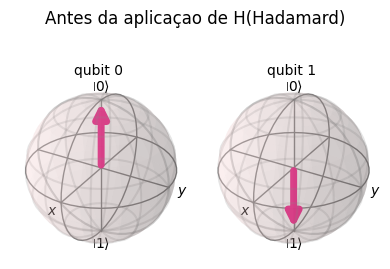

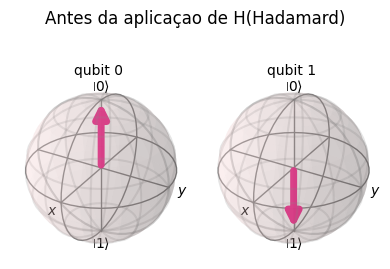

In [11]:
qH = QuantumRegister(2, 'q')
circuitH = QuantumCircuit(qH)  # Cria o circuito que vai operar nesse Qubit
initial_0 = [1, 0]  # |1>
initial_1 = [0, 1]  # |0>
circuitH.initialize(initial_0, qH[0])  # Injeta este estado no qubit
circuitH.initialize(initial_1, qH[1])  # Injeta este estado no qubit
state_vector_hadamard = Statevector(circuitH)  # basicamente, pega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_hadamard, figsize=(2, 2), title="Antes da aplica√ßao de H(Hadamard)",
                       title_font_size=12)

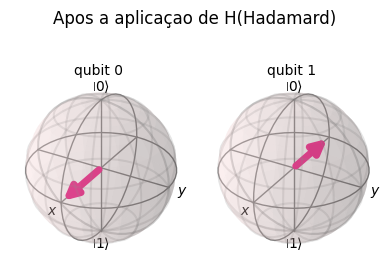

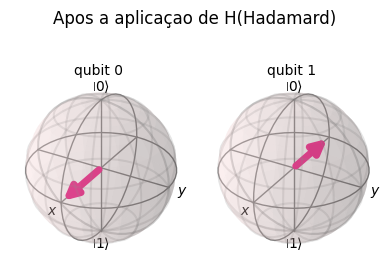

In [12]:
circuitH.h(qH[0])  # aplica a porta Z
circuitH.h(qH[1])  # aplica a porta Y
state_vector_hadamard_af = Statevector(circuitH)  # basicamente, wpega o vetor de estados desse circuito
plot_bloch_multivector(state_vector_hadamard_af, figsize=(2, 2), title="Apos a aplica√ßao de H(Hadamard)",
                       title_font_size=12)

###### Como a porta Hadamard "pensa"?
- Primeira linha: A nova amplitude de $|0\rangle$ sera a soma das amplitudes antigas.
- Segunda linha: A nova amplitude de $|1\rangle$ sera a subtra√ßao das amplitudes antigas.

- Se entrar como [1, 0] a soma √© 1 e a subtra√ßao √© 1 entao $|+\rangle$, ou [1, 1]
- Se entrar como [0, 1] a soma √© 1 e a subtra√ßao √© -1 entao $|-\rangle$, ou [1, -1]
- $|+\rangle$ e $|-\rangle$ s√£o relativos ao Eixo que esta apontando.


Um fato interessante √© que a porta Hadamard pode ser combinada com a porta Z para formar a porta X, e combinada com a X para formar a porta Z, usando as seguintes sequencias.

- $ X = HZH $
- $ Z = HXH $

Essas combina√ßoes sao bem uteis quando formor criar portas que nao estao presentes por padr√£o no Qiskit.

#### Desenhando Circuitos Quanticos
Assim como as portas logicas classicas s√£o combinadas para formar os circuitos logicos, nos podemos fazer o mesmo com as portas logicas quanticas.
Ap√≥s a constru√ßao do circuito √© possivel desenhar ele.

##### Circuito porta NOT(X).

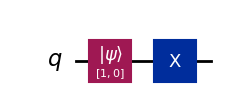

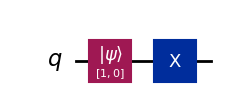

In [19]:
circuitNot.draw(output='mpl')

##### Circuito porta ZY.

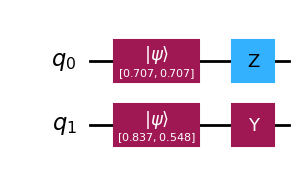

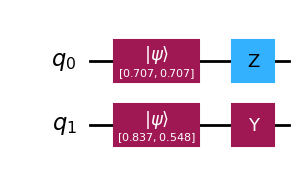

In [20]:
circuitZY.draw(output='mpl')

Circuito porta Hadamard(H).

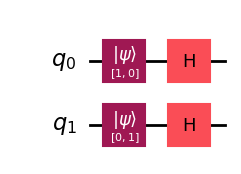

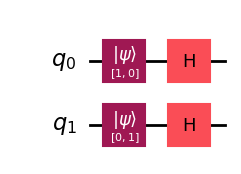

In [21]:
circuitH.draw(output='mpl')

Cada bloco, H, X, Y e Z representa uma das portas de 1 qubit usadas ate o momento.

#### Portas de m√∫ltiplosqubits
Parte das vantagens da computa√ßao quantica vem quando trabalhados com circuitos de multiplos qubits.

Como analisado anteriormente, o estado de 1-qubit tem duas amplitudes complexas ${\alpha,\beta}$, que √© definido em um espa√ßo de Hilbert, aonde o modulo ao quadrado corresponde as amplitudes de probabilidades dos estados. Podendo ser ${|0\rangle,|1\rangle}$.

Neste caso, da mesma forma que na computa√ßao classica, 2 bits tem 4 possiveis combina√ßoes, os Qubits tamb√©m tem a mesma equivalencia: ${|00\rangle,|01\rangle,|10\rangle,|11\rangle}$. De maneira geral, um sistema de N-qubits √© descrito por um estado quantico.
$$
|\Psi\rangle = c_1 |0\dots00\rangle + c_2 |0\dots01\rangle + c_3 |00\dots10\rangle + \dots + c_{2^N} |1\dots11\rangle
$$
onde N-qubits sao considerados como um unico sistema composto de $2^N$ estados na sua base, com
$$
\sum_{i=1}^{2^N} |c_i|^2 = 1
$$

Formula 1 descreve o estado geral de $|\Psi\rangle$ de um sistema de N qubits como um combina√ßao linear de todos os $2^N$ estados possiveis. Formula 2 √© a normaliza√ßao, garantindo que a soma das probabilidades alcance 1(ou 100%)

##### Porta CNOT(CX)
Uma das portas mais importantes √© a porta CNOT, ou NOT Controlado, CX. A porta CNOT √© uma porta de dois qubits, a atua√ßao so ocorre em casos aonde o qubit, que tem o nome de qubit de controle, tiver o valor $|1\rangle$. Nesse caso, atua-se a porta NOT no estado do outro qubit, que seria o alvo.
A sua representa√ßao matricial √©:
$$
    CNOT =
        \begin{pmatrix}
            1 & 0 & 0 & 0 \\
            0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 1 \\
            0 & 0 & 1 & 0 \\
        \end{pmatrix}
$$

Considerando os estados da base computacional para dois qubits: ${|00\rangle,|01\rangle,|10\rangle,|11\rangle}$, a atua√ßao da porta CNOT √©: (Assumindo que o primeiro qubit √© o de controle e o segundo o alvo)
$$ CNOT|00\rangle = |00\rangle$$
$$ CNOT|01\rangle = |01\rangle$$
$$ CNOT|10\rangle = |11\rangle$$
$$ CNOT|11\rangle = |10\rangle$$

###### Explicando matematicamente
Lembrando da base de tudo, a regra para um unico qubit √©:
- se for $|0\rangle$ √© o vetor que possui 1 na primeira posi√ßao $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$
- se for $|1\rangle$ √© o vetor que possui 1 na segunda posi√ßao $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$

A quest√£o √© como juntar o vetor do primeiro com o seguindo qubit para criar um vetor que poderia representar um sistema de 2 qubits?
A resposta √© uma opera√ßao matematica chamada de **Produto Tensorial**
A regra para fazer o produto tensorial entre $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ e $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, √© a seguinte:
1. Pegue o primeiro numero do primeiro vetor (1)
2. Multiplique (1) pelo segundo vetor inteiro.
3. Pegue o segundo numero do primeiro vetor(0).
4. Multiplique o segundo numero(0) pelo segundo vetor inteiro.
5. Junte tudo em um unico vetor coluna

$$
    \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes
        \begin{pmatrix} 0 \\ 1 \end{pmatrix}
            = \begin{pmatrix} 1\begin{pmatrix} 0 \\ 1\end{pmatrix} \\ 0\begin{pmatrix} 0 \\ 1\end{pmatrix} \end{pmatrix}
                = \begin{pmatrix} 10 \\ 11 \\ 00 \\ 01 \end{pmatrix}
$$

Neste caso, para cada vetor de $|00\rangle, |01\rangle, |10\rangle\ e\ |11\rangle$ temos que:
$$
    |0\rangle \otimes |0\rangle
            = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix}
                = \begin{pmatrix} 1 \begin{pmatrix} 1\\0 \end{pmatrix} 0 \begin{pmatrix} 1\\0 \end{pmatrix} \end{pmatrix}
                = \begin{pmatrix} 1 \times 1\\1 \times 0\\0 \times 1\\0 \times 0 \end{pmatrix}
                = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$
Para o vetor de $|01\rangle$
$$
    |0\rangle \otimes |1\rangle
    = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix}
    = \begin{pmatrix} 1 \begin{pmatrix} 0\\1 \end{pmatrix} 0 \begin{pmatrix} 0\\1 \end{pmatrix} \end{pmatrix}
    = \begin{pmatrix} 1 \times 0\\1 \times 1\\0 \times 0\\0 \times 1 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
$$
Para o vetor de $|10\rangle$
$$
    |1\rangle \otimes |0\rangle
    = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix}
    = \begin{pmatrix} 0 \begin{pmatrix} 1\\0 \end{pmatrix} 1 \begin{pmatrix} 1\\0 \end{pmatrix} \end{pmatrix}
    = \begin{pmatrix} 0 \times 1\\0 \times 0\\1 \times 1\\1 \times 0 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}
$$
Para o vetor de $|11\rangle$
$$
    |1\rangle \otimes |1\rangle
    = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix}
    = \begin{pmatrix} 0 \begin{pmatrix} 0\\1 \end{pmatrix} 1 \begin{pmatrix} 0\\1 \end{pmatrix} \end{pmatrix}
    = \begin{pmatrix} 0 \times 0\\0 \times 1\\1 \times 0\\1 \times 1 \end{pmatrix}
    = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}
$$


##### Porta CNOT(c√≥digo)
A porta CNOT pode ser implementado em um circuito com o qubit[0] sendo o de controle e o qubit[1] sendo o alvo.

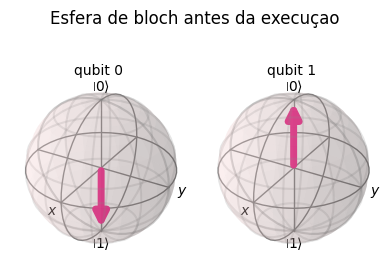

In [33]:
qCNOT = QuantumRegister(2, 'q')
circuitCNOT = QuantumCircuit(qCNOT)
circuitCNOT.initialize([0, 1], qCNOT[0])
circuitCNOT.initialize([1, 0], qCNOT[1])
state_vector_CNOT = Statevector(circuitCNOT)
plot_bloch_multivector(state_vector_CNOT, title="Esfera de bloch antes da execu√ßao", title_font_size=12, figsize=(2, 2))
circuitCNOT.cx(qCNOT[0], qCNOT[1])

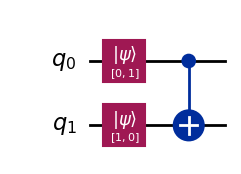

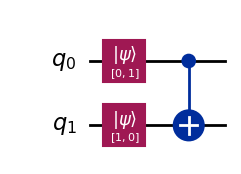

In [35]:
circuitCNOT.draw(output='mpl')

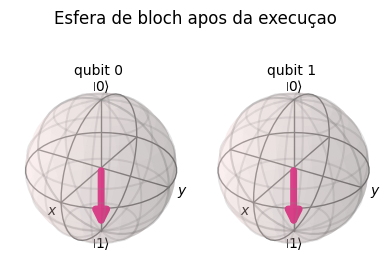

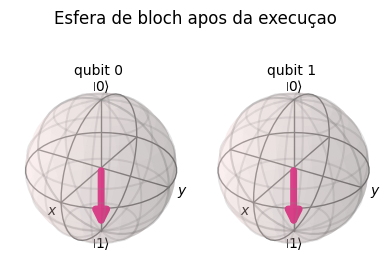

In [37]:
state_vector_CNOT = Statevector(circuitCNOT)
plot_bloch_multivector(state_vector_CNOT, title="Esfera de bloch apos da execu√ßao", title_font_size=12, figsize=(2, 2))

##### Porta Toffoli (CCX)
Uma das portas de multiplos qubits presente em varios circuitos √© a porta Toffoli(CCX). Esta porta atua executando a porta NOT no qubit alvo caso os dois primeiro qubits de controle estejam como $|1\rangle$, neste caso, √© uma porta de 3 qubits. Matricialmente:
$$
    CCX =
        \begin{pmatrix}
            10000000\\
            01000000\\
            00100000\\
            00010000\\
            00001000\\
            00000100\\
            00000001\\
            00000010\\
        \end{pmatrix}
$$

Esta porta pode ser implementada usando o qubit[0] e o qubit[1] como controle e o qubit[2] como alvo.


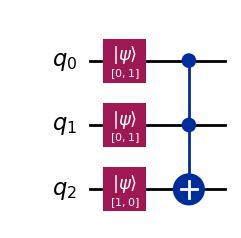

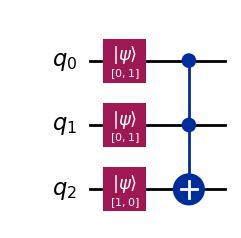

In [41]:
qCCX = QuantumRegister(3, 'q')
circuitCCX = QuantumCircuit(qCCX)
circuitCCX.initialize([0, 1], qCCX[0]) # |1>
circuitCCX.initialize([0, 1], qCCX[1]) # |1>
circuitCCX.initialize([1, 0], qCCX[2]) # |0>
circuitCCX.ccx(qCCX[0], qCCX[1], qCCX[2])
circuitCCX.draw(output='mpl')

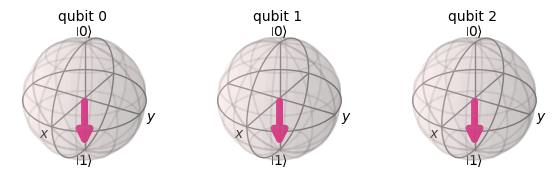

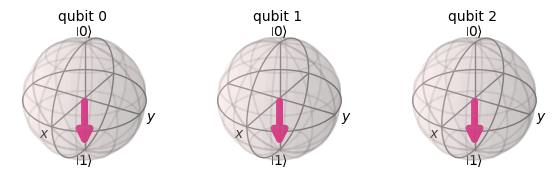

In [42]:
state_vector_CCCX = Statevector(circuitCCX)
plot_bloch_multivector(state_vector_CCCX, figsize=(2, 2))


# Medidas e distribui√ßoes de probabilidade.